# 1. Create a frequency distribution characterising the age of the sample and summarise the measures of central tendency. Describe the results emerging from the analysis.


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import statsmodels.api as sm
import plotly.io as pio
import plotly.express as px
pio.renderers.default="notebook_connected"

In [84]:
data=pd.read_excel("C:\\Users\\aniru\\OneDrive\\Desktop\\MVPA\\wcgs (1).xls")

In [85]:
data.head()

,age,bmi,chol,dbp,height,ncigs,sbp,smoke,weight
0,50,31.321007,249.0,90,67,25,132,Yes,200
1,51,25.328579,194.0,74,73,25,120,Yes,192
2,59,28.693878,258.0,94,70,0,158,No,200
3,51,22.148708,173.0,80,69,0,126,No,150
4,44,22.313034,214.0,80,71,0,126,No,160


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3154 non-null   int64  
 1   bmi     3154 non-null   float64
 2   chol    3142 non-null   float64
 3   dbp     3154 non-null   int64  
 4   height  3154 non-null   int64  
 5   ncigs   3154 non-null   int64  
 6   sbp     3154 non-null   int64  
 7   smoke   3154 non-null   object 
 8   weight  3154 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 221.9+ KB


In [87]:
data.describe()

,age,bmi,chol,dbp,height,ncigs,sbp,weight
count,3154.000000,3154.000000,3142.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000
mean,46.278694,24.518375,226.372374,82.015536,69.777743,11.600507,128.632847,169.953710
std,5.524045,2.567496,43.420426,9.726880,2.528693,14.517579,15.117731,21.095762
min,39.000000,11.190612,103.000000,58.000000,60.000000,0.000000,98.000000,78.000000
25%,42.000000,22.955103,197.250000,76.000000,68.000000,0.000000,120.000000,155.000000
50%,45.000000,24.389795,223.000000,80.000000,70.000000,0.000000,126.000000,170.000000
75%,50.000000,25.840160,253.000000,86.000000,72.000000,20.000000,136.000000,182.000000
max,59.000000,38.947369,645.000000,150.000000,78.000000,99.000000,230.000000,320.000000


Treating null values.

In [88]:
data.isnull().sum()/data.shape[0]

age       0.000000
bmi       0.000000
chol      0.003805
dbp       0.000000
height    0.000000
ncigs     0.000000
sbp       0.000000
smoke     0.000000
weight    0.000000
dtype: float64

In [89]:
 data.dropna(inplace=True)

In [90]:
data.isnull().sum()/data.shape[0]

age       0.0
bmi       0.0
chol      0.0
dbp       0.0
height    0.0
ncigs     0.0
sbp       0.0
smoke     0.0
weight    0.0
dtype: float64

In [91]:
ages=data["age"]
age_series=pd.Series(ages)
freq_dist_age = age_series.value_counts()

In [92]:
freq_dist_age

40    274
39    266
44    234
41    233
42    221
43    214
45    185
46    170
48    164
47    147
49    134
50    134
51    123
52    113
54    106
53    105
55     79
56     75
57     63
58     56
59     46
Name: age, dtype: int64

# frequency distribution of age

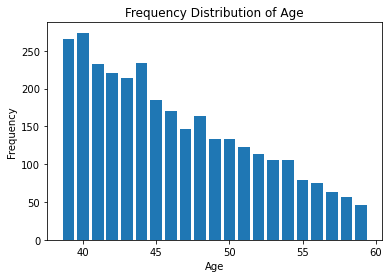

In [93]:
plt.bar(freq_dist_age.index, freq_dist_age.values)

plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("Frequency Distribution of Age")
plt.show()

#  Histogram along with a kernel density estimate (KDE) of the distribution.

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

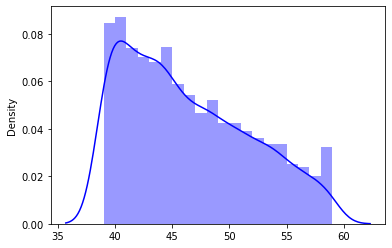

In [94]:
sns.distplot(x=data['age'],kde=True,color='blue',bins=20)

In [95]:
data['age'].describe()

count    3142.000000
mean       46.274666
std         5.518455
min        39.000000
25%        42.000000
50%        45.000000
75%        50.000000
max        59.000000
Name: age, dtype: float64

In [96]:
import statistics
mean=statistics.mean(data['age'])
median=statistics.median(data['age'])
mode=statistics.mode(data['age'])
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 46.27466581795035
Median: 45.0
Mode: 40


From the above plot we can say that the frequency distribution of age is not normally distributed. we can also infer that the
data points are right skewed and most of the data points are distributed in the left side. Here the mean is slightly larger than the median and mode is less than both mean and median. Right-skewed data, also known as positively skewed data, is a type of distribution in which the tail of the data extends towards the right, with most of the data concentrated on the left side of the distribution. This means that there are more values on the left side of the distribution, and fewer values on the right side of the distribution. the skewness can be the effect of outliers present in the data.

# 2. Does the variable Systolic Blood Pressure (sbp) represent the characteristics of a normally distributed variable? If yes, please justify how do you arrive at this conclusion and if No, how it can be transformed to a normally distributed variable.

Checking sbp is normally distributed or not using boxplot,histogram and density plots

In [97]:
sbp=data['sbp']

In [98]:
sbp

0       132
1       120
2       158
3       126
4       126
       ... 
3149    134
3150    126
3151    120
3152    110
3153    128
Name: sbp, Length: 3142, dtype: int64

In [99]:
fig = px.histogram(data, x='sbp')
fig.show()

<AxesSubplot:xlabel='sbp'>

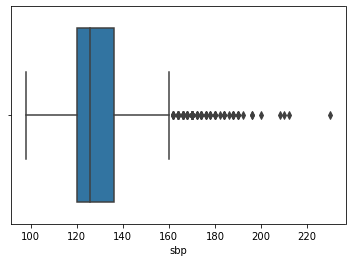

In [100]:
sns.boxplot(x=sbp)

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

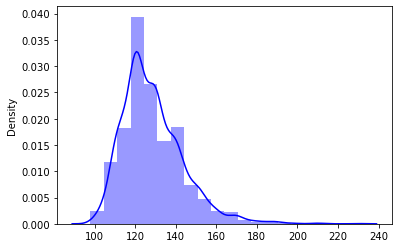

In [101]:
sns.distplot(x=data['sbp'],kde=True,color='blue',bins=20)

from the aouve three plots we can infer that the data points are not normally ditributed.there is skewness towards the right. to check the distribution further we need to conduct shapiro (p value) test.

In [102]:
from scipy.stats import shapiro

stat, p = shapiro(sbp)

print('Test statistic:', stat)
print('P-value:', p)

if p > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Test statistic: 0.9346733093261719
P-value: 4.4623475993329976e-35
The data is not normally distributed


from the above result we can say that the p value is less than 0.05 and the data points are not normally distributed.

To make this data normally distributed we can use four methods. 
1-log transformation
2-square root transformation
3-z value transformation
4-box-cox transformation

# Log transformation

In [103]:
log_sbp = np.log(sbp)

In [104]:
from scipy.stats import shapiro

stat, p = shapiro(log_sbp)

print('Test statistic:', stat)
print('P-value:' + str(p))

if p > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Test statistic: 0.9695612192153931
P-value:2.649216786861751e-25
The data is not normally distributed


# square root

In [105]:
sbp_sqrt = np.sqrt(sbp)

In [106]:
from scipy.stats import shapiro

stat, p = shapiro(sbp_sqrt)

print('Test statistic:', stat)
print('P-value:', p)

if p > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Test statistic: 0.9542002081871033
P-value: 2.530796455286467e-30
The data is not normally distributed


# Z transformation

In [107]:
from scipy import stats

In [108]:
z_sbp = stats.zscore(sbp)

In [109]:
z_sbp

0       0.225300
1      -0.572027
2       1.952842
3      -0.173363
4      -0.173363
          ...   
3149    0.358188
3150   -0.173363
3151   -0.572027
3152   -1.236466
3153   -0.040475
Name: sbp, Length: 3142, dtype: float64

In [110]:
from scipy.stats import shapiro

stat, p = shapiro(z_sbp)

print('Test statistic:', stat)
print('P-value:', p)

if p > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Test statistic: 0.9346728920936584
P-value: 4.4614519162595317e-35
The data is not normally distributed


# Box cox transformation

In [111]:
sbp_boxcox,lambda_boxcox = stats.boxcox(sbp)

In [112]:
from scipy.stats import shapiro

stat, p = shapiro(sbp_boxcox)

print('Test statistic:', stat)
print('P-value:',p)

if p > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Test statistic: 0.44058215618133545
P-value: 0.0
The data is not normally distributed


all the four transformations infer that the data points are not normally ditributed.
It is mainly because of the presence of outliers in the data. so we need to treat the outliers to get a normal
distribution.

Treating outliers using z score

In [113]:
df=data.copy()
df_sbp=df['sbp']

In [114]:


# Calculate Z-scores for the data
z_scores = np.abs((df_sbp - df_sbp.mean()) / df_sbp.std())


z_scores


0       0.225264
1       0.571936
2       1.952531
3       0.173336
4       0.173336
          ...   
3149    0.358131
3150    0.173336
3151    0.571936
3152    1.236269
3153    0.040469
Name: sbp, Length: 3142, dtype: float64

In [115]:
# Define a threshold beyond which values are considered outliers
threshold = 2

# Identify outliers based on the threshold
outliers = df_sbp[z_scores > threshold]

In [116]:
outliers

57      184
61      200
82      162
86      172
129     160
       ... 
2932    160
3014    178
3069    160
3091    170
3109    160
Name: sbp, Length: 125, dtype: int64

In [117]:
# Remove outliers from the data
clean_sbp = df_sbp[z_scores <= threshold]

In [118]:
fig = px.histogram( x=df_sbp[z_scores <= threshold])
fig.show()

<AxesSubplot:xlabel='sbp'>

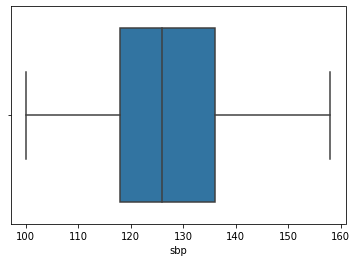

In [119]:
sns.boxplot(x=clean_sbp)

In [120]:
from scipy.stats import shapiro

stat, p = shapiro(clean_sbp)

print('Test statistic:', stat)
print('P-value:',p)

if p > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Test statistic: 0.9775651097297668
P-value: 2.030032893556542e-21
The data is not normally distributed


Even removing the outliers, we were not able to make this a normal distribution.

from this we can conclude that the data is not normally distributed in any of the transformations 
as well as by treating outliers.

# 3. It is assumed that Systolic Blood Pressure (sbp) varies positively with the Body Mass Index (bmi). Examine this hypothesis and create a graph to display the relationship.

checking the distribution of variable 'bmi'

In [121]:
fig = px.histogram(data, x='bmi')
fig.show()

checking the distribution of variable 'sbp'

In [122]:
fig = px.histogram(data, x='sbp')
fig.show()

Both the variables are not properly normally distributed.

<AxesSubplot:xlabel='bmi', ylabel='sbp'>

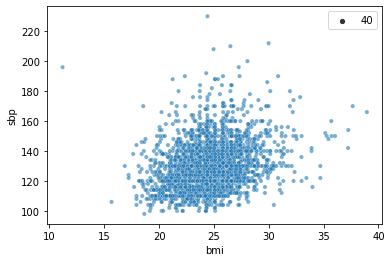

In [123]:
sns.scatterplot(data=data,x='bmi', y='sbp', alpha=0.6, size=40)

In [124]:
fig = px.scatter(data, x='bmi', y='sbp', trendline='ols')
fig.show()

Finding correlation coefficient between variables 'bmi' and 'sbp'

In [125]:
corr = data['sbp'].corr(data['bmi'])
print(f"Correlation coefficient: {corr}")

Correlation coefficient: 0.2877920315706091


Conducting pearsons test to identify the coefficient is significant or not

In [126]:
import scipy.stats as stats

corr_coef, p_value = stats.pearsonr(data['bmi'],data['sbp'])

if p_value < 0.05:
    print(f"p-value: {p_value}, correlation is significant with coefficient {corr_coef}")
else:
    print(f"p-value: {p_value}, correlation is not significant with coefficient {corr_coef}")


p-value: 5.538175074196627e-61, correlation is significant with coefficient 0.28779203157060906


here the correlation coefficient is in between 0 and 1. so that we can say that sbp varies positively with bmi.
null hypothesis: The correlation between bmi and sbp is not positive.
alternate hypothesis: The correlation between bmi and sbp is positive.
From the p value we can conclude that our null hypothesis is false.

This means that there is a direct or positive relationship between the two variables. This means that as BMI increases, sbp also tends to increase.
However, it is important to note that correlation does not imply causation. Just because there is a positive correlation between BMI and sbp, it does not necessarily mean that increasing BMI causes an increase in sbp. There could be other factors at play, such as lifestyle, genetics, or underlying health conditions, that are contributing to the observed relationship.
Therefore, it is important to carefully consider the context and other factors involved before drawing any causal conclusions from a positive correlation between two variables.

# 4. Draw box-plots for the variables Systolic Blood Pressure (sbp) and Diastolic Blood Pressure (dbp). Form these graphs what do you conclude about the following: (i) Location and Spread, (ii) Interquartile Range, and (iii) Range of Observations and outliers.

In [127]:
px.box(x=data['sbp'])

In [128]:
location_sbp = np.median(data['sbp'])
spread_sbp = np.std(data['sbp'])
q1_sbp, q3_sbp = np.percentile(data['sbp'], [25, 75])
iqr_sbp = q3_sbp - q1_sbp
lower_bound_sbp = q1_sbp - 1.5 * iqr_sbp
upper_bound_sbp = q3_sbp + 1.5 * iqr_sbp
outliers_sbp = data[(data['sbp'] < lower_bound_sbp) | (data['sbp'] > upper_bound_sbp)]
range_of_observations_sbp = np.ptp(data['sbp'])

In [129]:
print(outliers_sbp)

      age        bmi   chol  dbp  height  ncigs  sbp smoke  weight
57     43  23.731674  173.0  116      72      0  184    No     175
61     55  28.055031  256.0  122      69      0  200    No     190
82     50  26.078358  263.0   92      71      0  162    No     187
86     59  25.856258  252.0  114      73      0  172    No     196
206    52  26.578449  300.0  110      69     20  184   Yes     180
...   ...        ...    ...  ...     ...    ...  ...   ...     ...
2799   51  37.652805  153.0  108      69     12  170   Yes     255
2884   51  23.731674  236.0   98      72      0  162    No     175
2910   51  25.824490  266.0  110      70     15  172   Yes     180
3014   43  25.541523  183.0  120      68      0  178    No     168
3091   48  23.731674  184.0  124      72      0  170    No     175

[96 rows x 9 columns]


In [130]:
print("location:", location_sbp)
print("spread:", spread_sbp) 
print("iqr:", iqr_sbp)
print("range_of_observations:", range_of_observations_sbp)
print("upper_bound:", upper_bound_sbp)
print("lower_bound:", lower_bound_sbp)

location: 126.0
spread: 15.05028761285186
iqr: 16.0
range_of_observations: 132
upper_bound: 160.0
lower_bound: 96.0


Location refers to the central tendency here it is median. In this case, the location value is 126.0.
Spread refers to how much the values in the dataset vary from each other. The spread value of 15.05028761285186 indicates 
that the values in the dataset are relatively tightly clustered around the central tendency.
IQR refers to the range of values between the first quartile (25th percentile) and the third quartile (75th percentile) 
of the dataset. In this case, the IQR value is 16.0 (in between 120 and 136).
Range of Observations refers to the difference between the maximum and minimum values in the dataset. 
In this case, the range of observations is 132.


In [131]:
px.box(x=data['dbp'])

In [132]:
location_dbp = np.median(data['dbp'])
spread_dbp = np.std(data['dbp'])
q1_dbp, q3_dbp = np.percentile(data['dbp'], [25, 75])
iqr_dbp = q3_dbp - q1_dbp
lower_bound_dbp = q1_dbp - 1.5 * iqr_dbp
upper_bound_dbp = q3_dbp + 1.5 * iqr_dbp
outliers_dbp = data[(data['dbp'] < lower_bound_dbp) | (data['dbp'] > upper_bound_dbp)]
range_of_observations_dbp = np.ptp(data['dbp'])

In [133]:
print(outliers_dbp)

      age        bmi   chol  dbp  height  ncigs  sbp smoke  weight
54     58  22.034121  216.0   60      71      0  104    No     158
57     43  23.731674  173.0  116      72      0  184    No     175
61     55  28.055031  256.0  122      69      0  200    No     190
86     59  25.856258  252.0  114      73      0  172    No     196
87     46  22.375578  191.0  112      72     10  152   Yes     165
...   ...        ...    ...  ...     ...    ...  ...   ...     ...
3052   45  25.087770  195.0   60      72      0  106    No     185
3054   39  27.021423  230.0  108      69      0  150    No     183
3067   42  24.781359  250.0  102      68      0  136    No     163
3091   48  23.731674  184.0  124      72      0  170    No     175
3101   50  20.524437  251.0   60      68     20  116   Yes     135

[141 rows x 9 columns]


In [134]:
print("location:", location_dbp)
print("spread:", spread_dbp)
print("iqr:", iqr_dbp)
print("range_of_observations:", range_of_observations_dbp)
print("upper_bound:", upper_bound_dbp)
print("lower_bound:", lower_bound_dbp)

location: 80.0
spread: 9.635229559563184
iqr: 10.0
range_of_observations: 78
upper_bound: 101.0
lower_bound: 61.0


Location refers to the central tendency here it is median. In this case, the location value is 80. 
Spread refers to how much the values in the dataset vary from each other. The spread value of 9.635229559563184 indicates 
that the values in the dataset are relatively tightly clustered around the central tendency. 
IQR refers to the range of values between the first quartile (25th percentile) and the third quartile (75th percentile) 
of the dataset. In this case, the IQR value is 10 (in between 76 and 86). 
Range of Observations refers to the difference between the maximum and minimum values in the dataset. 
In this case, the range of observations is 78

from this we can say that the spread of sbp is greater than the spread of sbp.

# 5. The data consists of a categorical variable Current Smoking (smoke) that is coded in two categories (Yes and No). Create a box-plots for Total Cholesterol (chol), Diastolic Blood Pressure (dbp) and Systolic Blood Pressure (sbp) by the categorical variable. Explain the results that emerge from the analysis.

In [135]:
px.box(data, x='smoke', y='chol')

The range of chol for smokers is between 123 and 339 mg/dl, and for non-smokers is between 113 and 330 mg/dl, according to a plot of the categorical variable "smoking" vs CHOL. The median cholesterol level among smokers is 228 mg/dl, compared to 219 mg/dl in non-smokers. So, we can infer that smoking causes one's cholesterol to increase.

In [136]:
px.box(data, x='smoke', y='dbp')

When the categorical variable "smoking" is plotted with DBP, we can see that the upper and lower bounds are, respectively, 100 and 62 mm/hg for smokers, while they are 106 and 60 mm/hg for non-smokers. The average blood pressure for smokers and non-smokers is 80 mm/hg. It follows that smoking may have some effect on a person's dbp. Smokers have lower DBP than non-smokers.

In [137]:
px.box(data, x='smoke', y='sbp')

Plotting the categorical variable "smoking" versus SBP reveals that the average SBP ranges between 100 and 160, with outliers surpassing 160, for both smokers and non-smokers. Both smokers and nonsmokers had a median SBP of 126. Smoking therefore has little to no impact on a person's sbp.

# 6. It is hypothesised that smoking has a positive and linear impact on both Diastolic Blood Pressure (dbp) and Systolic Blood Pressure (sbp). How will you test this hypothesis? What do the results emerging from the test suggest about the nature of the relationship in the wcgs dataset? Hint: Thinks about the variable ncigs in the dataset that depicts the number of cigarettes smoked per day.

<AxesSubplot:xlabel='ncigs', ylabel='sbp'>

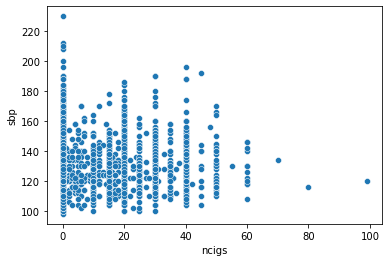

In [138]:
sns.scatterplot(x='ncigs', y='sbp', data=data)


<AxesSubplot:xlabel='ncigs', ylabel='dbp'>

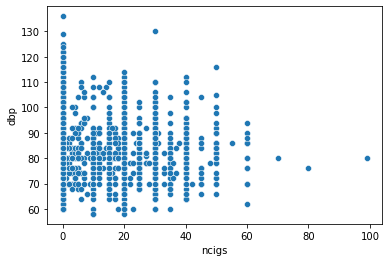

In [139]:
sns.scatterplot(x='ncigs', y='dbp', data=data)

This plot will show the relationship between ncigs and sbp, and ncigs and dbp. 
We can then perform a linear regression analysis on these variables using the statsmodels library in Python:

In [140]:
import statsmodels.api as sm

In [141]:

# Define the independent variable (ncigs) and the dependent variables (sbp and dbp)
X = data['ncigs']
y1 = data['sbp']
y2 = data['dbp']

# Add a constant to the independent variable (ncigs) to allow for an intercept in the regression model
X = sm.add_constant(X)

# Fit a linear regression model for sbp and dbp against ncigs
model1 = sm.OLS(y1, X).fit()
model2 = sm.OLS(y2, X).fit()

# Print the summary of the regression results for sbp and dbp
print(model1.summary())
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    sbp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.695
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.101
Time:                        22:57:55   Log-Likelihood:                -12976.
No. Observations:                3142   AIC:                         2.596e+04
Df Residuals:                    3140   BIC:                         2.597e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.2571      0.344    373.256      0.0

<AxesSubplot:xlabel='ncigs', ylabel='dbp'>

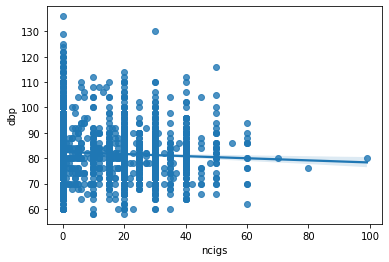

In [142]:
sns.regplot(x=data['ncigs'], y=data['dbp'])

<AxesSubplot:xlabel='ncigs', ylabel='sbp'>

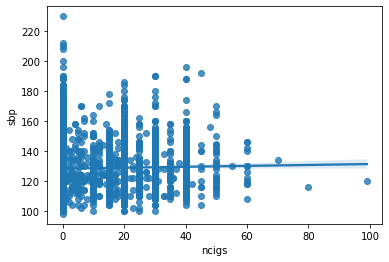

In [143]:
sns.regplot(x=data['ncigs'],y=data['sbp'])

The regression results will show us the coefficients, standard errors, p-values, and R-squared values for each regression model. We can use the p-values to determine whether the coefficients for the ncigs variable are statistically significant, which would suggest a significant linear relationship between smoking and blood pressure.

If the p-values are less than the significance level (usually 0.05), we can reject the null hypothesis that there is no relationship between smoking and blood pressure, and conclude that there is a significant linear relationship between these variables.

However, if the p-values are greater than the significance level, we fail to reject the null hypothesis, and conclude that there is not enough evidence to suggest a significant relationship between smoking and blood pressure.

from the OLS regression result of sbp vs ncigs we can see a positive coefficient which depicts sbp is directly proportional to ncigs with an intercept of 128.257(value of dependent variable-sbp when independent variable-ncig is zero). Here the p value is 0.101 which is greater than 0.05 so we are failed to reject the null hypothesis and we have to accept the null hypothesis. null hypothesis- There is no significant relationship between sbp and ncigs.

from the OLS regression result of dbp vs ncigs we can see a negative coefficient which depicts dbp is inversly proportional to ncigs with an intercept of 82.4636(value of dependent variable-dbp when independent variable-ncig is zero). Here the p value is 0.0004 which is less than 0.05 so we can reject the null hypothesis and we will accept the alternate hypothesis. null hypothesis- There is no significant relationship between dbp and ncigs. Alternate hypothesis-There is significant relationship between dbp and ncigs.

Here both the R-squared values are very less (0.001 and 0.004). the R-squared values lies between 0 and 1. 
with a higher value indicating a better fit of the model but we got small values so we can say that both the model doesn't fit well.

error component of both the models are almost same.